## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

**1. 同樣使用鳶尾花(iris)資料集，進行參數的調整**

**(1) 原本結果**

In [25]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 讀取鳶尾花資料集
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = iris.feature_names

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(x, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)


# 印出結果
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc, "\n")

print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158 

Feature importance:  [0.         0.01796599 0.05992368 0.92211033]


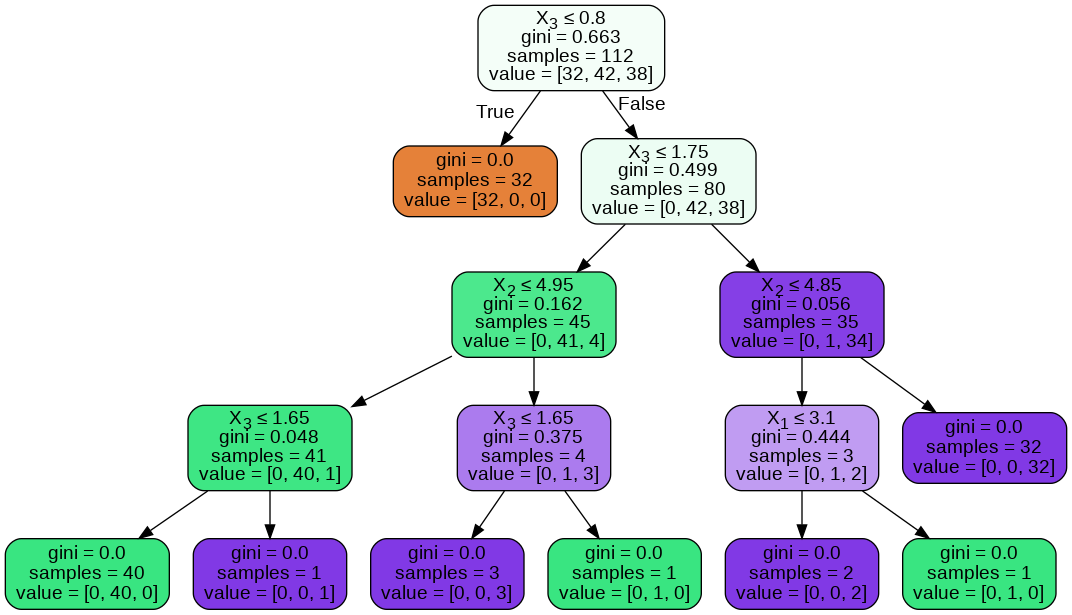

In [26]:
####  將樹的分支結果印出來

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**(2) 調整資訊量為墒(原本為gini係數)：**

係數與因子貢獻度不同，但準確率一樣

In [5]:
# 建立模型
clf = DecisionTreeClassifier(criterion='entropy')

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 印出結果
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc, "\n")

print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158 

Feature importance:  [0.0156062  0.         0.62264163 0.36175217]


**(3) 調整分支原則(原本為best)：**

準確率下降了

In [6]:
# 建立模型
clf = DecisionTreeClassifier(splitter='random')

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 印出結果
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc, "\n")

print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9210526315789473 

Feature importance:  [0.03657363 0.05037388 0.03259544 0.88045705]


**(4) 限制樹的深度(原本沒有限制)：**

限制為1層才有差，2或3都不影響分類準確率

In [10]:
# 建立模型
clf = DecisionTreeClassifier(max_depth=1)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 印出結果
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc, "\n")

print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.6842105263157895 

Feature importance:  [0. 0. 0. 1.]


**2. 改用 boston 資料集，並與迴歸結果比較**

**(1) 一般迴歸結果**

In [15]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

data_boston = datasets.load_boston()

##  x
x = pd.DataFrame(data_boston.data)
x.columns = data_boston.feature_names
x.head()

##  y
y = pd.Series(data_boston.target)
y.unique()

##  切割資料集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 印出係數
print(regr.coef_, "\n")

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01] 

Mean squared error: 17.04


**(2) 決策樹結果：**
結果決策樹的結果比一般迴歸差

In [16]:
# 建立模型
clf = DecisionTreeRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 印出係數
print(regr.coef_, "\n")

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01] 

Mean squared error: 25.18


In [17]:
####  將樹的分支結果印出來

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.